<a href="https://colab.research.google.com/github/adshyam/Breast_Cancer_Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Data Cleaning and Pre-processing

First, lets start by importing our data using pandas. 

In [ ]:
data = pd.read_csv("/content/Breast_Cancer_Data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Missing Data Analysis

First, lets start by checking if our data contains NaN values. We will look at each column and see how many missing values are present in each. This will help us determine an imputation scheme if needed. 

In [ ]:
# Loop through all columns nand count number of NaN values
col_nans = {}
for col in data.columns:
  num_nans = data[col].isna().sum()
  if num_nans > 0:
    col_nans[col] = num_nans

print(f"{len(col_nans)} columns have NaN values. ")
col_nans

1 columns have NaN values. 


{'Unnamed: 32': 569}

We can see that the only column in our dataset that contains NaN values is "Unnamed: 32". This column is composed entirely on NaN values and thus is likely mis-input or an artifact of some sort. For these reasons, we will drop and disregard this column. 

In [ ]:
data = data.drop(columns=["Unnamed: 32"], inplace=False)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now that that column is gone, we can see that we have 32 useable features with zero missing data. However, if we look at our target column, "diagnosis", we can see that it is in string form with only tow unique entries. These entries are "M" to signify a malignant diagnosis, and "B" to signify a benign diagnosis. Lets take a look at the ratio of Ms' to Bs' to determine how balanced this dataset is. 

In [ ]:
Ms = len(data[data["diagnosis"] == "M"])
Bs = len(data[data["diagnosis"] == "B"])
print(f"There are {Ms} malignant diagnoses and {Bs} benign diagnoses. ")

There are 212 malignant diagnoses and 357 benign diagnoses. 


We can see that class imbalance exists, however, it is not that severe and likely will not be a major issue. Next we need to convert this to a numeric column for modeling and visualization. To do so, we will be encoding benign diagnoses as a zero and malignant diagnoses as a 1. We will also be creating a copy of the data frame to do this in so we can retain an untransformed copy of the original data. Finally, we will be dropping the "id" column as  it should not be used as a feature. 

In [ ]:
# Creating an encoded vector representation of the diagnosis column
diagnosis_numeric = [1 if x == "M" else 0 for x in data["diagnosis"]]

# Creating a copy of the original dataframe to serve as our altered version for modeling
data_cleaned = data.copy(deep=True)

# Replacing the diagnosis column with our encoded vector and dropping id
data_cleaned["diagnosis"] = diagnosis_numeric
data_cleaned = data_cleaned.drop(columns=["id"], inplace=False)
data_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Next, lets take a look at the rest of our features and see if there are any others that need to be encoded. 

In [ ]:
data_cleaned.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

We can see that all of our columns are numeric data types and thus we do not need to encode any other data or create and dummy variables. 

## Visualization

To start off our visualization, we will use a:
- Violin plot to display the distribution of the data.
- Swarm plot to which feature looks more clear in terms of classification.

 However, before we proceed, it is important to normalize or standardize the data as the differences between the values of the features are too high to be effectively observed on the plot. In order to more effectively observe the features, I will divide them into three groups, each consisting of ten features, and plot them separately. This will allow us to more clearly see any patterns or trends that may exist within each group, as well as any differences or similarities between the groups. By analyzing the data in this way, we can gain a deeper understanding of the underlying relationships and structure of the data, which can in turn inform our decision-making and analysis going forward.

## Violin plot

In [ ]:
y = data_cleaned.diagnosis
x = data_cleaned.drop(columns=['diagnosis'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

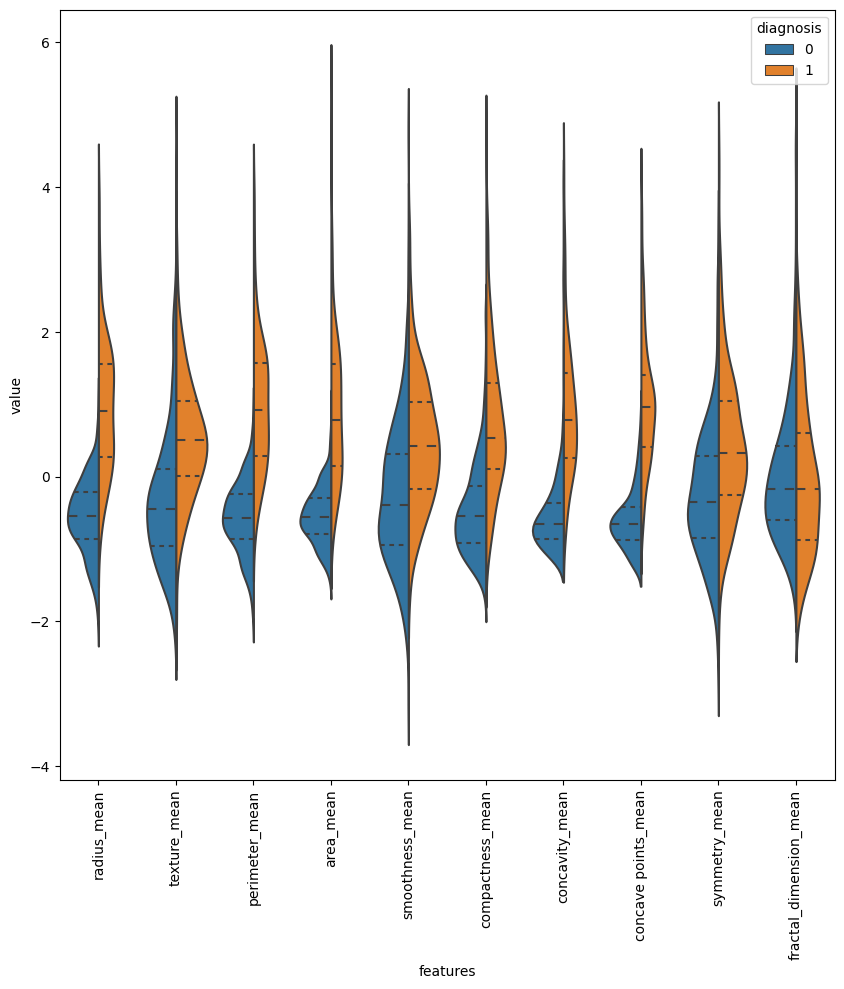

In [ ]:
#@title First 10 features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

What feature has the best distribution?

- texture_mean feature

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

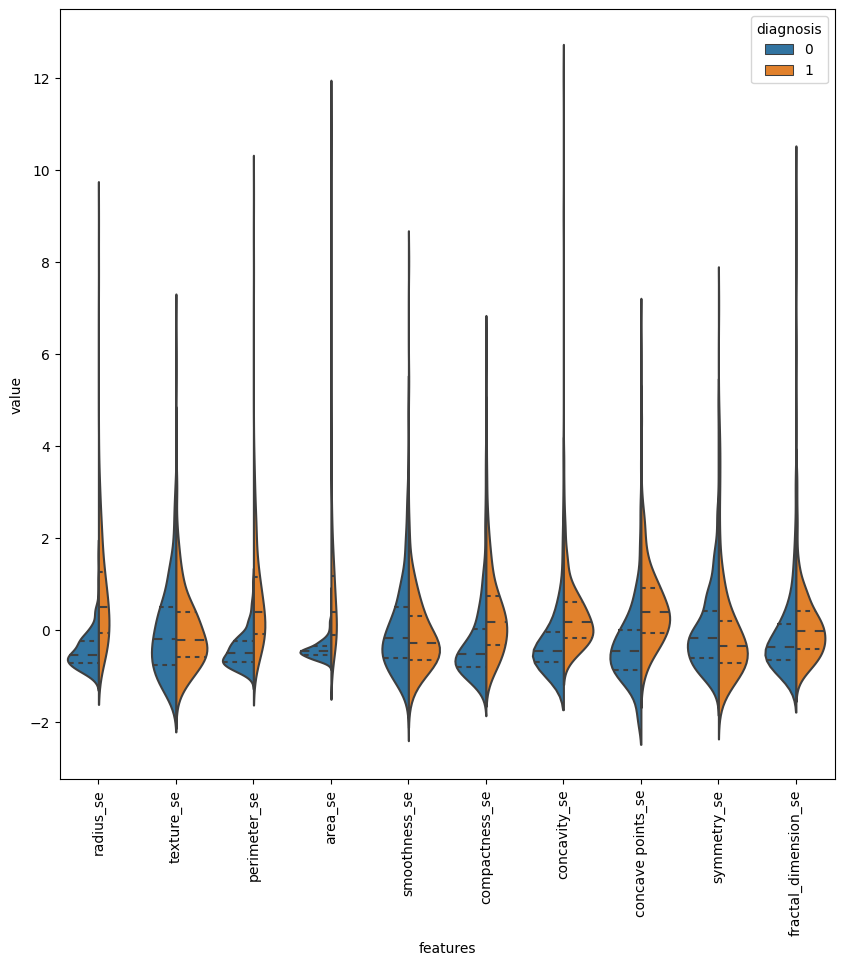

In [ ]:
#@title Second 10 features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

What feature has the best distribution?

all except: radius_se, perimenter_se, area_se 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

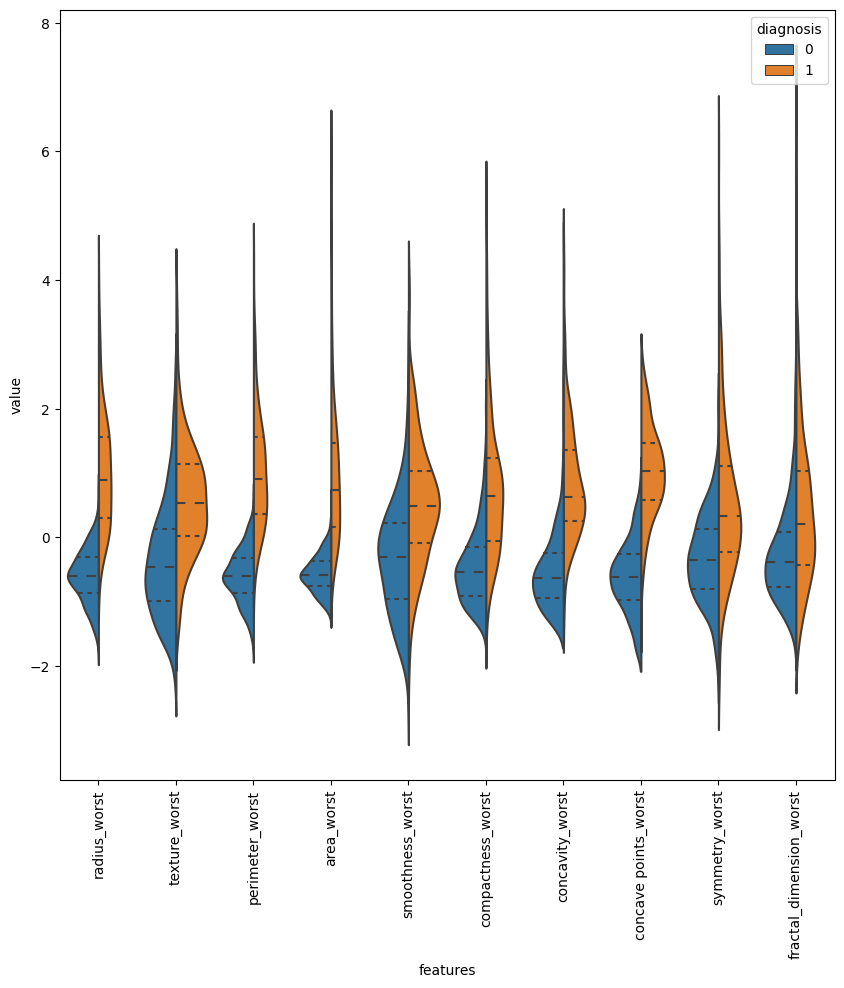

In [ ]:
#@title Third 10 features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

What feature has the best distribution?

Non

----

More findings:

The variables concavity_worst and concave point_worst appear to have a similar shape, but we need to further investigate to determine if they are correlated. To do this, we will use a joint plot, which will allow us to visualize the distribution of each variable and the relationship between them. By analyzing the joint plot, we can better understand the correlation between the two variables and determine if they have a significant impact on our analysis. But first we will plot the Swarm plot to see our findings.

## Swarm plot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

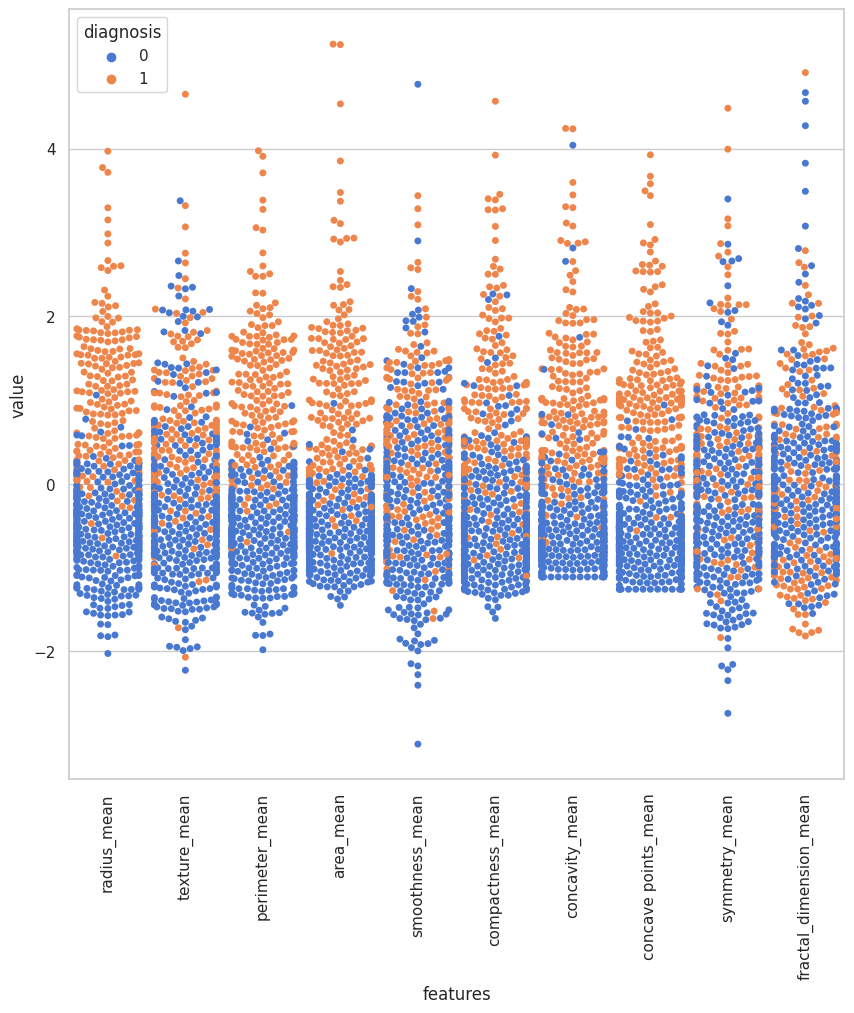

In [ ]:
#@title First 10 features
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

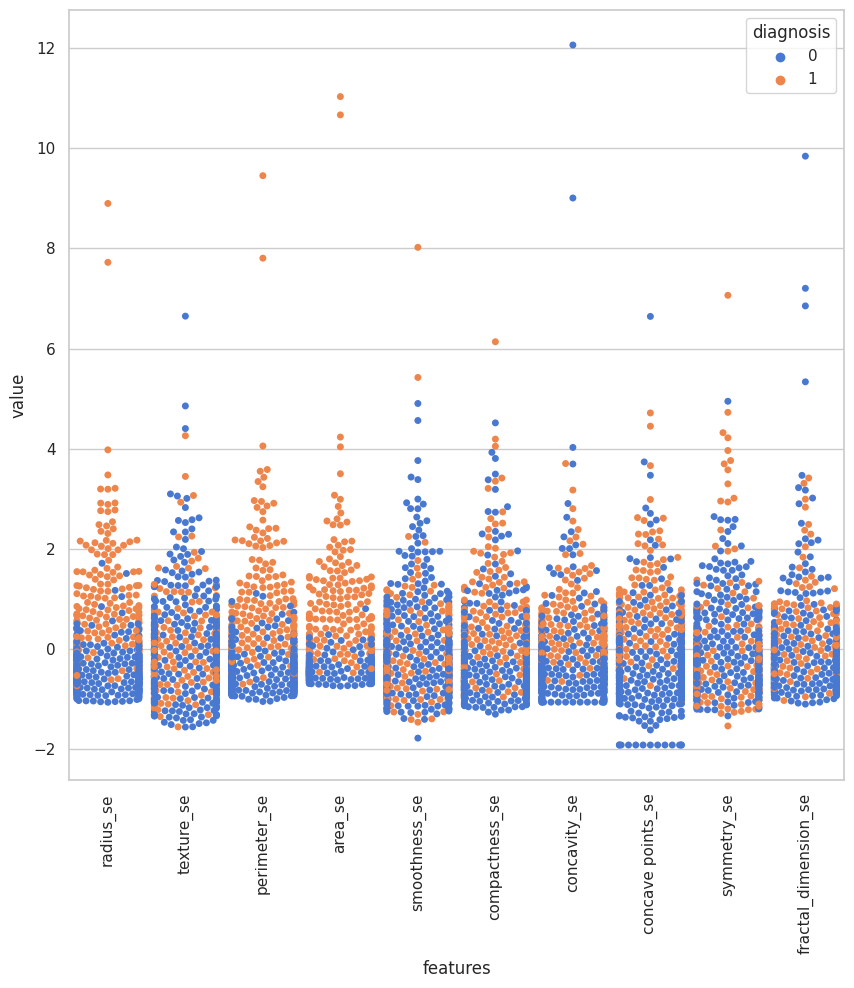

In [ ]:
#@title Second 10 features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data);
plt.xticks(rotation=90)

swarm plot time:  58.45497727394104  s


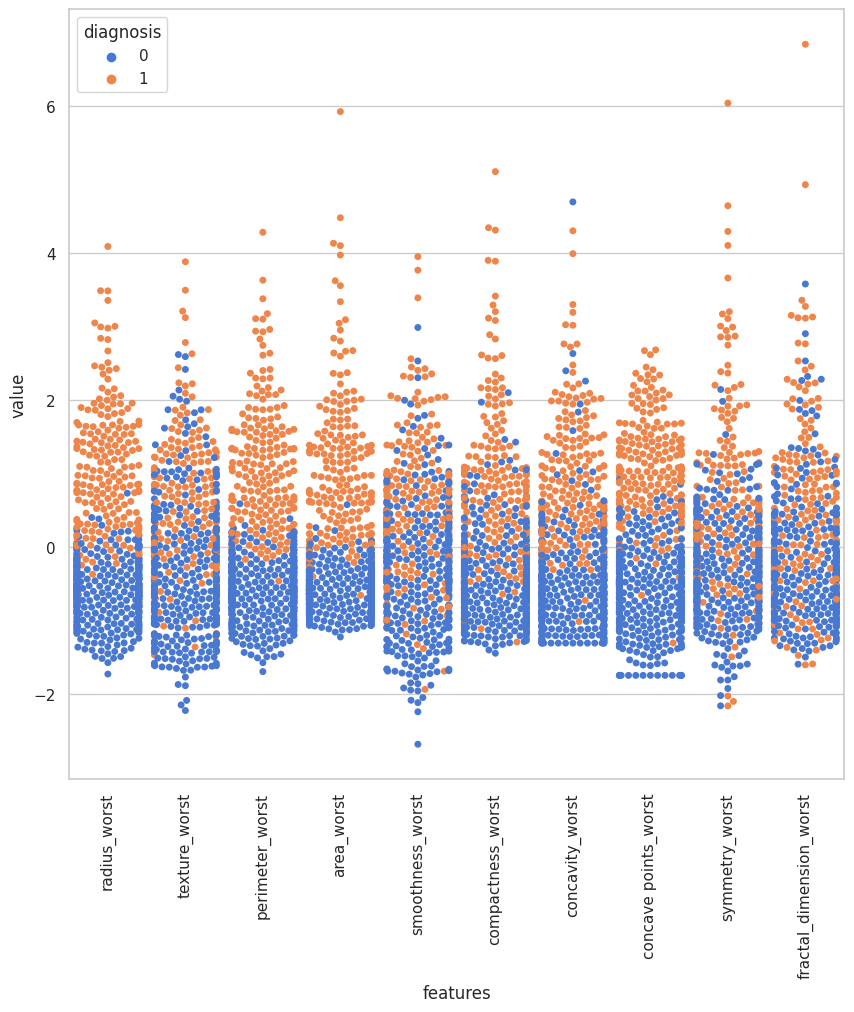

In [ ]:
#@title Third 10 features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

Swarm pot observation:

The Swarm plot helps to visualize variance more clearly. Based on our observations, the feature area_worst is both the best and worst in terms of classification. As shown in the plots, area_worst is mostly separated from other features. On the other hand, smoothness_se looks very mixed and is therefore difficult to classify using this feature.


## Joint plot

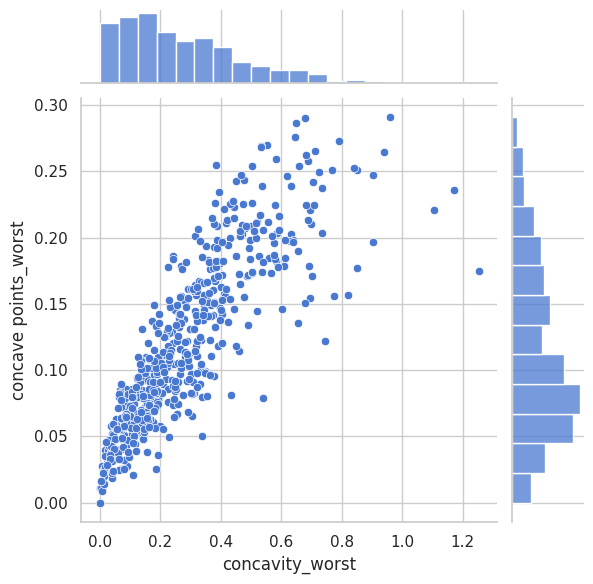

In [ ]:
sns.jointplot(data=data_cleaned, x="concavity_worst", y="concave points_worst")

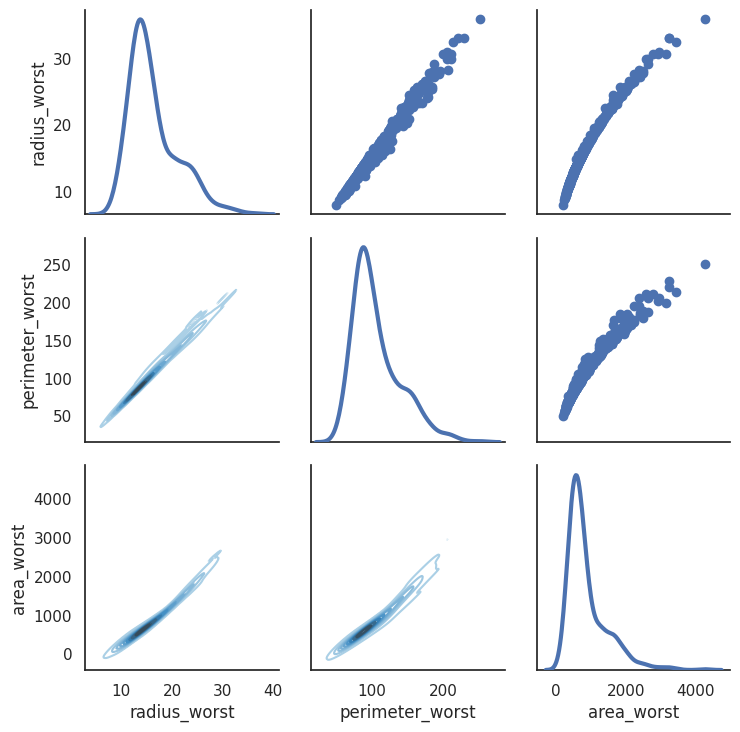

In [ ]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

According to the graph, there is a correlation between concavity_worst, concave point_worst and area_worst, which confirms our hypothesis.

To be sure we didnt miss any other correlation, we will use a heatmap.

## Heat map

<Axes: >

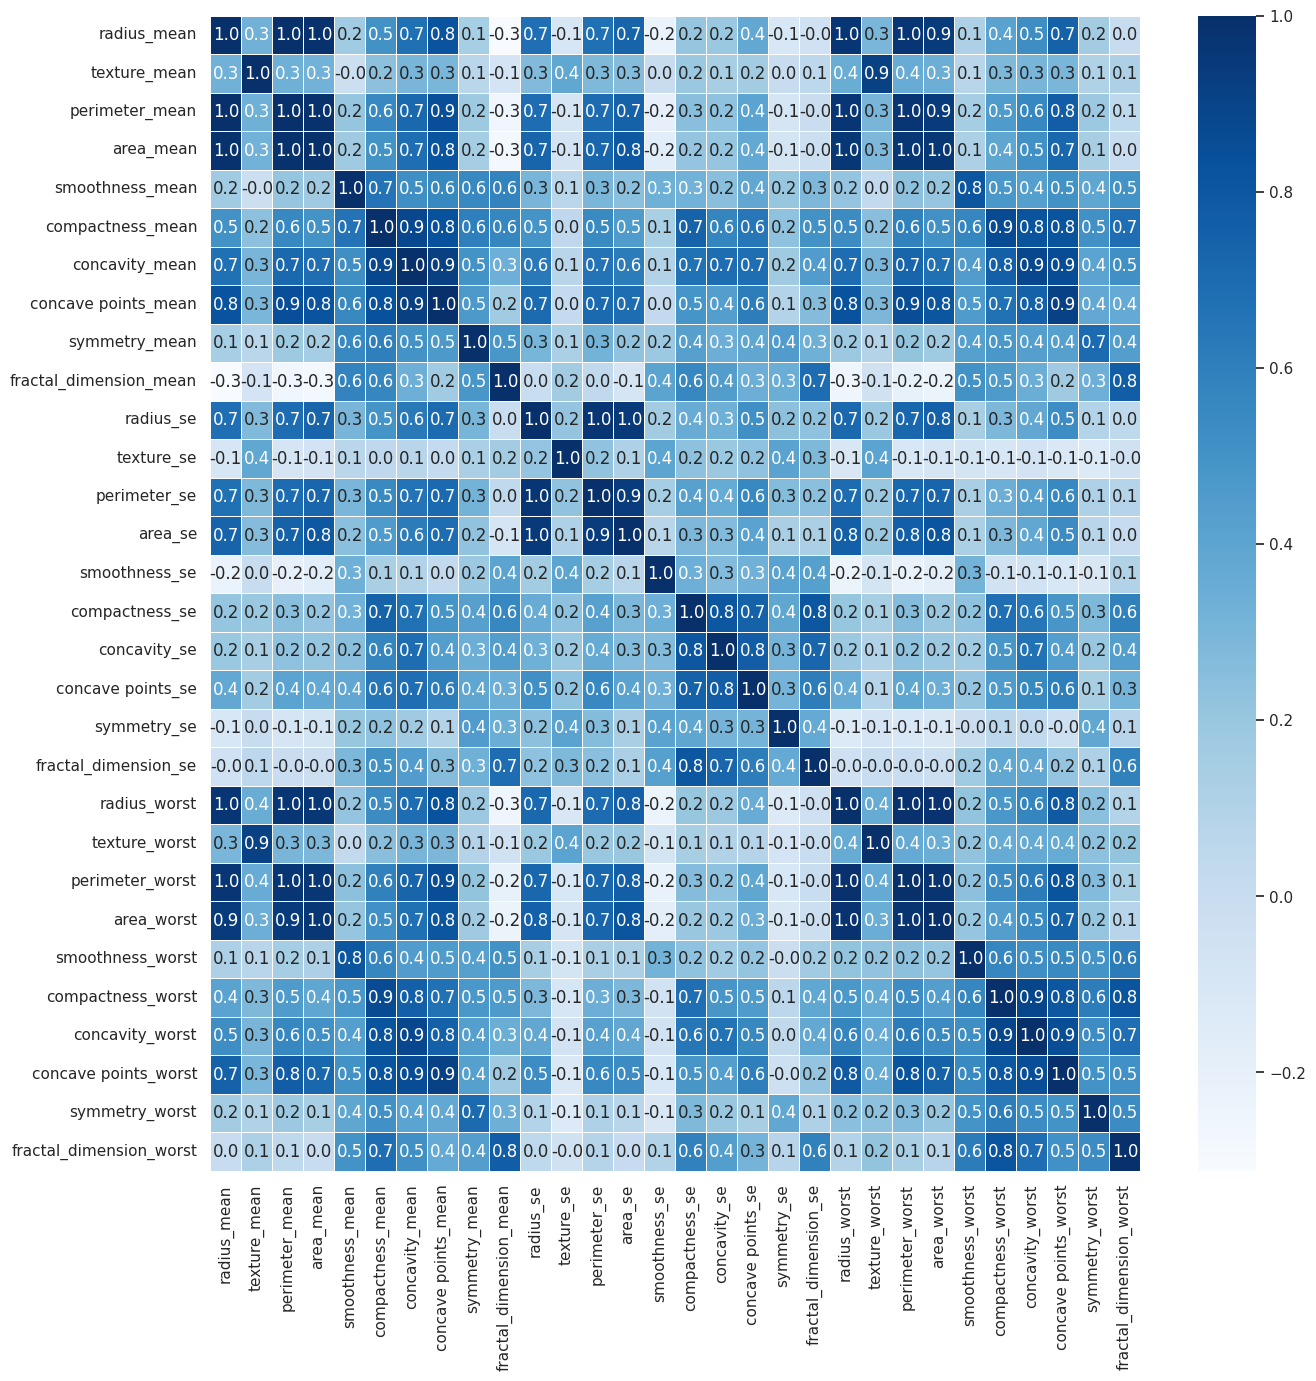

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="Blues")

As shown in the heat map, the features radius_mean, perimeter_mean, and area_mean are highly correlated. To avoid redundancy, we will only use the area_mean feature. The choice of area_mean was subjective, based on visual inspection of swarm plots. However, different choices could be made by other analysts. To evaluate the impact of these choices, we will explore the correlation between other features and test the accuracy of our random forest classifier.

- correlated variables:

**Compactness_mean, concavity_mean, concave points_mean** 

only use **concavity_mean**. 

----

- correlated variables:

**radius_se, perimeter_se, area_se** 

only use **area_se**. 

----

- correlated variables:

**radius_worst, perimeter_worst and area_worst** 

only use **area_worst**

----

- correlated variables:

**Compactness_worst, concavity_worst, concave points_worst**

only use **concavity_worst**

----

- correlated variables:

**Compactness_se, concavity_se, concave points_se**

only use **concavity_se** 

----

- correlated variables:

**texture_mean, texture_worst** 

only use **texture_mean**

----

- correlated variables:

**area_worst, area_mean** 

only use **area_mean**

> We will drop the variables which we wont use.

In [ ]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df_visualization = x.drop(drop_list,axis = 1 )       
df_visualization .head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<Axes: >

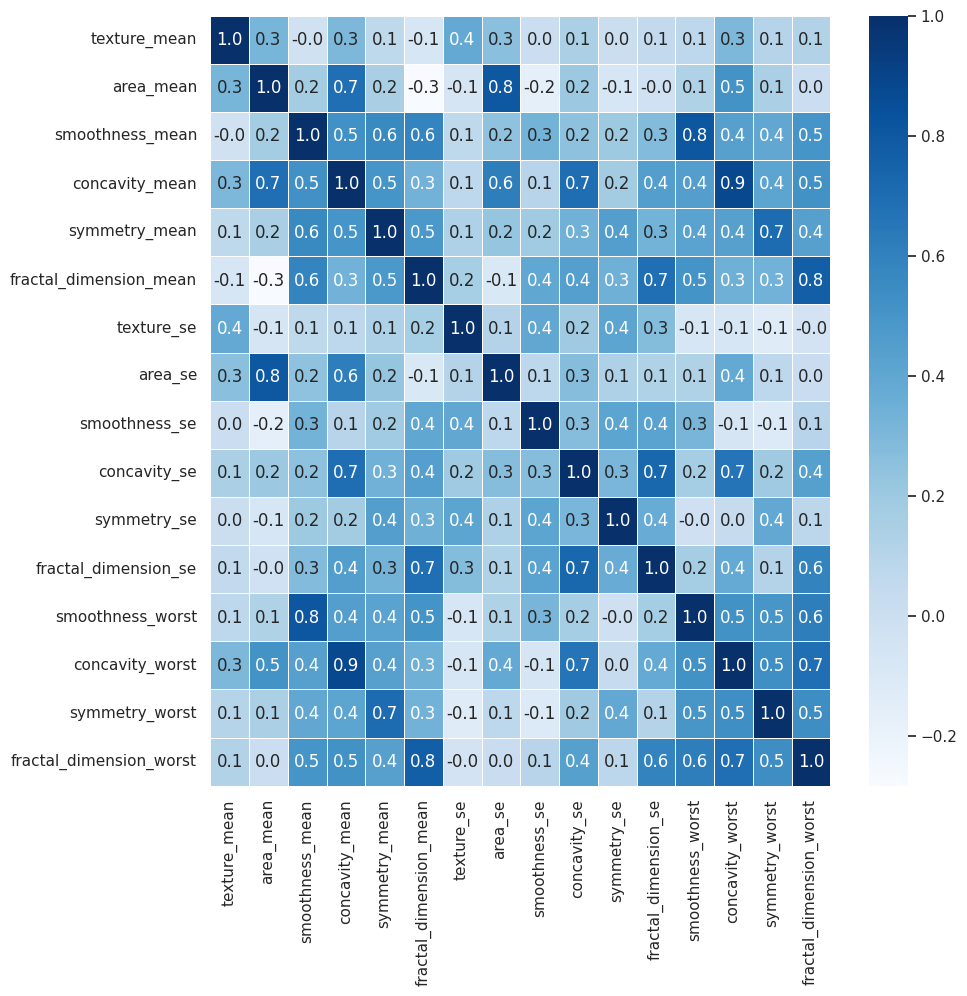

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_visualization .corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="Blues")

Result is much better now

# Modeling

In [ ]:
y = data_cleaned.diagnosis
x = data_cleaned.drop(columns=['diagnosis'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [ ]:
# Confusion matrix 

def plot_confusion_matrix(cm,classes,    #cm is confusion metric, classess is class present in data
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 1. Logistic Regression

In [ ]:
clf_log = LogisticRegression(random_state=0) 

# performing grid search cv to find the best hyperparameters used for the Logistic regression model
params_grid = {
    'penalty':['l2','l1'],
    'C' :[0.001, 0.01, 0.1, 1, 10, 100]
    }
#defined model to perform Grid search CV
clf_log_cv = GridSearchCV(estimator = clf_log, param_grid = params_grid, scoring ='accuracy')
clf_log_cv.fit(x_train, y_train)
best_params_log = clf_log_cv.best_params_
print("The best parameters for using Logistic Regression model is:", best_params_log)


The best parameters for using Logistic Regression model is: {'C': 100, 'penalty': 'l2'}


The accuracy score on train data using Logistic regression model is 0.95
The accuracy score on test data using Logistic regression model is 0.95
The F1 score on test data using Logistic regression model is 0.94
                                                                                 


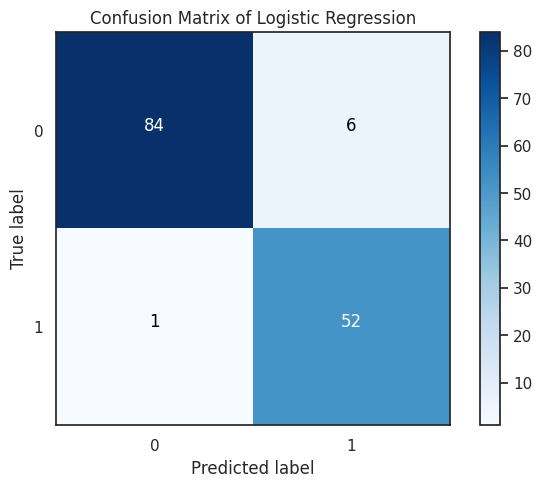

In [ ]:
# Using the best hyperparameters we got above to see the performance of Logistic regression model

clf_log_cv = LogisticRegression(C=100, penalty = 'l2', random_state=0) # defined the model on the basis of best parameters
clf_log_cv.fit(x_train, y_train)

y_pred_train_log =  clf_log_cv.predict(x_train) #predicting y train values
y_pred_test_log =  clf_log_cv.predict(x_test) # predicting y test values

#predicting accuracy score
train_acc_log = accuracy_score(y_train, y_pred_train_log)
test_acc_log  = accuracy_score(y_test, y_pred_test_log)

#predicting f1 score
f1_score_log = f1_score(y_test, y_pred_test_log)

print(f"The accuracy score on train data using Logistic regression model is {train_acc_log:.2f}")
print(f"The accuracy score on test data using Logistic regression model is {test_acc_log:.2f}")
print(f"The F1 score on test data using Logistic regression model is {f1_score_log:.2f}")

print("                                                                                 ")

# confusion metrics
cm_log = confusion_matrix(y_test, y_pred_test_log)
class_names = [0,1]
plot_confusion_matrix(cm_log, classes = class_names, title='Confusion Matrix of Logistic Regression');

### 2. Support Vector Classifier

In [ ]:
svc = SVC() 
params = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C' :[0.001, 0.01, 0.1, 1, 10]    
}

grid_search_svc = GridSearchCV(svc, params)
grid_search_svc.fit(x_train, y_train)

best_params_svc = grid_search_svc.best_params_

print("The best parameters for using Support Vector Classifier  is:", best_params_svc)


The best parameters for using Support Vector Classifier  is: {'C': 1, 'gamma': 0.0001}


The accuracy score on train data using Support Vector Classifier is 0.94
The accuracy score on test data using Support Vector Classifier is 0.94
The F1 score on test data using Support Vector Classifier is 0.92
                                                                                 


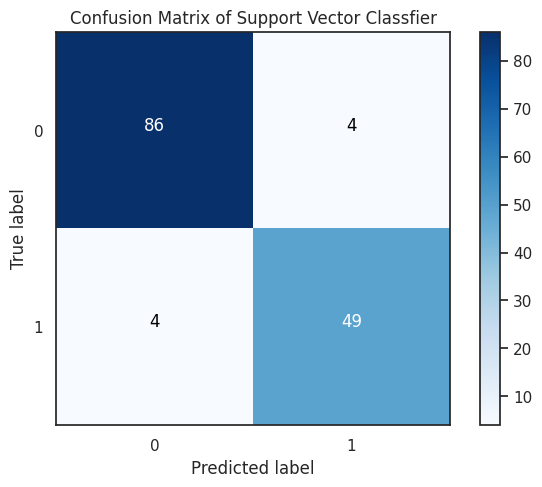

In [ ]:
svc_clf = SVC(C=1, gamma=0.0001) #SVC model with the best hyper parameters
svc_clf.fit(x_train, y_train)

y_pred_train_svc =  svc_clf.predict(x_train) #predicting y train values
y_pred_test_svc =  svc_clf.predict(x_test) # predicting y test values

#predicting accuracy score
train_acc_svc = accuracy_score(y_train, y_pred_train_svc)
test_acc_svc  = accuracy_score(y_test, y_pred_test_svc)

#predicting f1 score
f1_score_svc = f1_score(y_test, y_pred_test_svc)

print(f"The accuracy score on train data using Support Vector Classifier is {train_acc_svc:.2f}")
print(f"The accuracy score on test data using Support Vector Classifier is {test_acc_svc:.2f}")
print(f"The F1 score on test data using Support Vector Classifier is {f1_score_svc:.2f}")

print("                                                                                 ")

# confusion metrics
cm_svc= confusion_matrix(y_test, y_pred_test_svc)
class_names = [0,1]
plot_confusion_matrix(cm_svc, classes = class_names, title='Confusion Matrix of Support Vector Classfier');


### 3. Decision Tree Classifier

In [ ]:
clf_dtc = DecisionTreeClassifier()
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 15, 1),
    'min_samples_leaf' : range(1, 5, 1),
    'min_samples_split' : range(2, 10, 1),
    }

grid_search_dtc = GridSearchCV(clf_dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(x_train, y_train)

best_params_dtc = grid_search_dtc.best_params_

print("The best parameters of Decision Tree classifier are :", best_params_dtc)

Fitting 5 folds for each of 832 candidates, totalling 4160 fits
The best parameters of Decision Tree classifier are : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6}


The accuracy score on train data using Decision Tree Classifier is 0.99
The accuracy score on test data using Decision Tree Classifier is 0.94
The F1 score on test data using Decision Tree Classifier is 0.92
                                                                                 


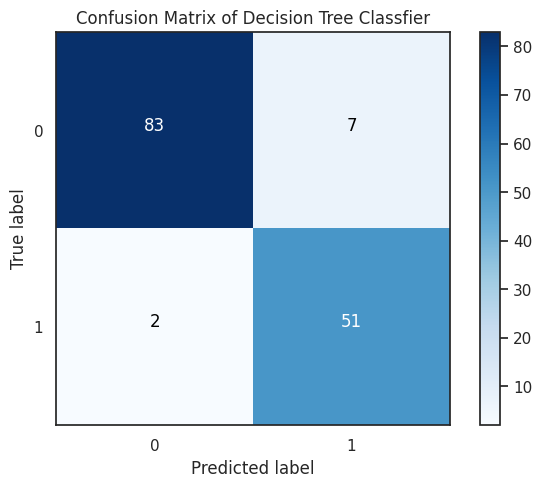

In [ ]:
clf_dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth= 13, min_samples_leaf = 3, 
                                min_samples_split = 5)
clf_dtc.fit(x_train, y_train)

y_pred_train_dtc =  clf_dtc.predict(x_train) #predicting y train values
y_pred_test_dtc =  clf_dtc.predict(x_test) # predicting y test values

#predicting accuracy score
train_acc_dtc = accuracy_score(y_train, y_pred_train_dtc)
test_acc_dtc  = accuracy_score(y_test, y_pred_test_dtc)

#predicting f1 score
f1_score_dtc = f1_score(y_test, y_pred_test_dtc)

print(f"The accuracy score on train data using Decision Tree Classifier is {train_acc_dtc:.2f}")
print(f"The accuracy score on test data using Decision Tree Classifier is {test_acc_dtc:.2f}")
print(f"The F1 score on test data using Decision Tree Classifier is {f1_score_dtc:.2f}")

print("                                                                                 ")

# confusion metrics
cm_dtc = confusion_matrix(y_test, y_pred_test_dtc)
class_names = [0,1]
plot_confusion_matrix(cm_dtc, classes = class_names, title='Confusion Matrix of Decision Tree Classfier');

### 4. Random Forest Classifier

In [ ]:
clf_rfc = RandomForestClassifier() # create a random forest classifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

# create a grid search 
grid_search_rfc = GridSearchCV(estimator = clf_rfc, param_grid = param_grid, cv =5)
grid_search_rfc.fit(x_train, y_train)


best_params_rfc = grid_search_rfc.best_params_

print("The best parameters of Decision Tree classifier are :", best_params_rfc)

The best parameters of Decision Tree classifier are : {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


The accuracy score on train data using Random Forest Classifier is 1.00
The accuracy score on test data using Random Forest Classifier is 0.98
The F1 score on test data using Random Forest Classifier is 0.97
                                                                                 


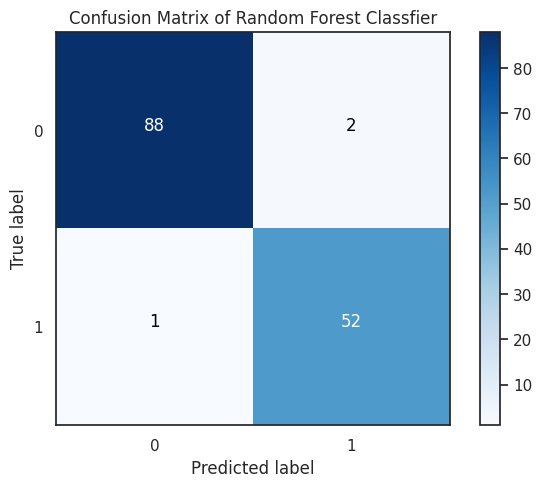

In [ ]:
clf_rfc = RandomForestClassifier(n_estimators= 100, max_depth = 10, min_samples_leaf =1, min_samples_split = 2)

clf_rfc.fit(x_train, y_train)

y_pred_train_rfc =  clf_rfc.predict(x_train) #predicting y train values
y_pred_test_rfc =  clf_rfc.predict(x_test) # predicting y test values

#predicting accuracy score
train_acc_rfc = accuracy_score(y_train, y_pred_train_rfc)
test_acc_rfc  = accuracy_score(y_test, y_pred_test_rfc)

#predicting f1 score
f1_score_rfc = f1_score(y_test, y_pred_test_rfc)

print(f"The accuracy score on train data using Random Forest Classifier is {train_acc_rfc:.2f}")
print(f"The accuracy score on test data using Random Forest Classifier is {test_acc_rfc:.2f}")
print(f"The F1 score on test data using Random Forest Classifier is {f1_score_rfc:.2f}")

print("                                                                                 ")

# confusion metrics
cm_rfc = confusion_matrix(y_test, y_pred_test_rfc)
class_names = [0,1]
plot_confusion_matrix(cm_rfc, classes = class_names, title='Confusion Matrix of Random Forest Classfier');

# Conclusion

### Conclusion
Based on the Breast Cancer Wisconsin Data, I applied logistic regression, support vector classifier (SVC), decision tree classifier, and random forest classifier and obtained a high F1 score of each models. 

Among the tested models, the random forest classifier demonstrated the highest F1 score. The random forest algorithm is an ensemble method that combines multiple decision trees to make predictions and it leverages the strength of decision trees while reducing the risk of overfitting by averaging the predictions of multiple trees.

The high F1 score obtained with the random forest classifier suggests that it is performing well in terms of both precision and recall, which are crucial in the context of cancer diagnosis. The model shows promising performance in accurately identifying both malignant and benign cases.

Considering the high F1 score, the random forest classifier is a suitable choice for the breast cancer diagnosis task and can be considered as the final model for breast cancer diagnosis. 
